In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv')

In [4]:
train.iloc[:, 1:-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     20000 non-null  int64 
 1   Gender                  20000 non-null  object
 2   Education_Status        20000 non-null  object
 3   Employment_Status       20000 non-null  object
 4   Working_Week (Yearly)   20000 non-null  int64 
 5   Industry_Status         20000 non-null  object
 6   Occupation_Status       20000 non-null  object
 7   Race                    20000 non-null  object
 8   Hispanic_Origin         20000 non-null  object
 9   Martial_Status          20000 non-null  object
 10  Household_Status        20000 non-null  object
 11  Household_Summary       20000 non-null  object
 12  Citizenship             20000 non-null  object
 13  Birth_Country           20000 non-null  object
 14  Birth_Country (Father)  20000 non-null  object
 15  Bi

### 결측치 없음

In [5]:
train.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


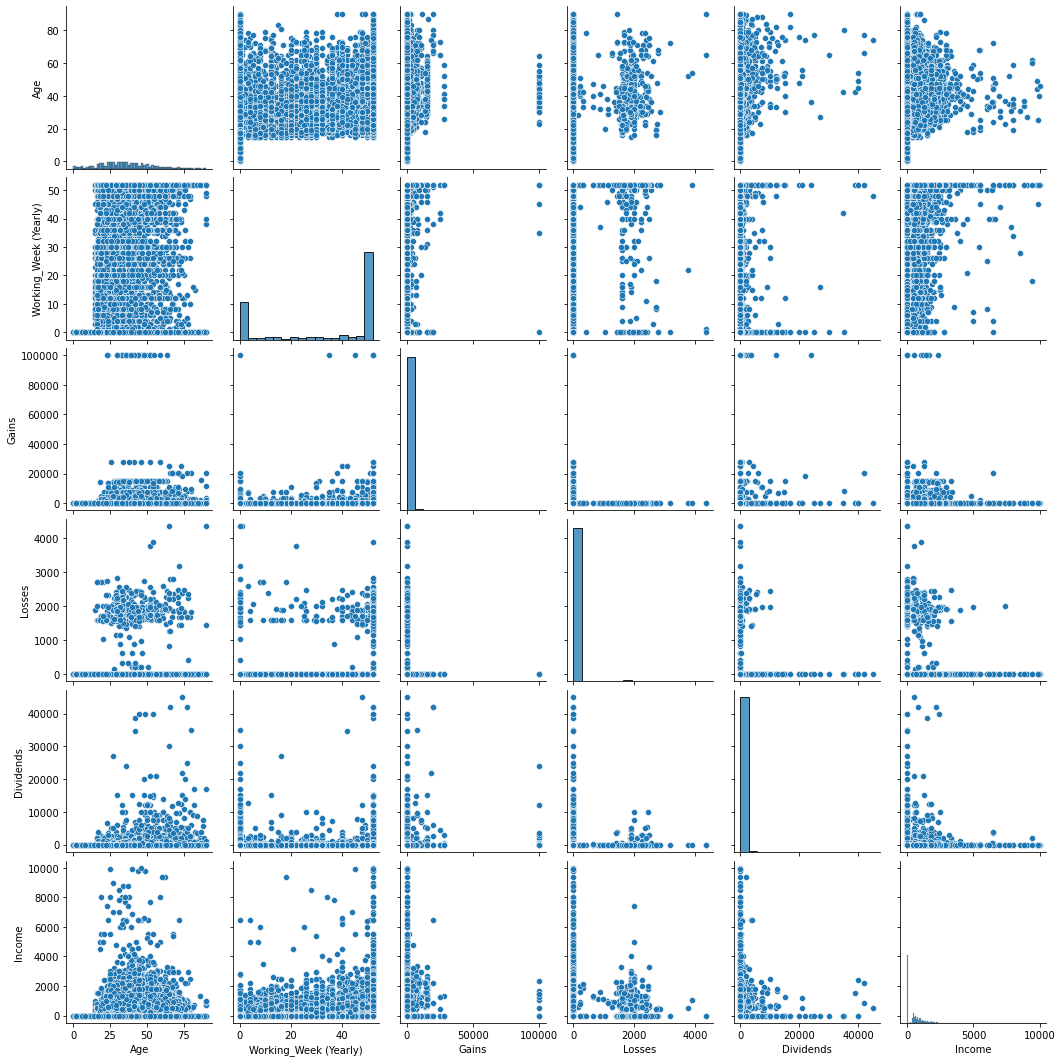

In [53]:
sns.pairplot(train)
plt.show()

### correlation

<AxesSubplot:>

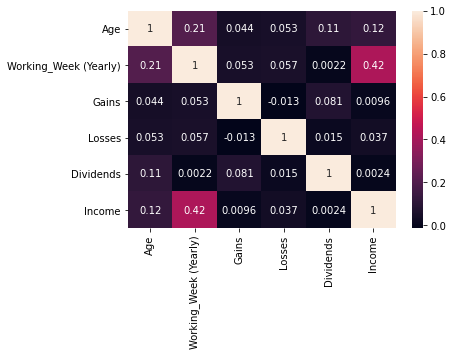

In [54]:
corr = train.corr()
sns.heatmap(corr, annot=True)

In [15]:
cat_cols = list(train.dtypes[train.dtypes == "object"].index)
cat_cols

['ID',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Income_Status']

### target 분포 확인

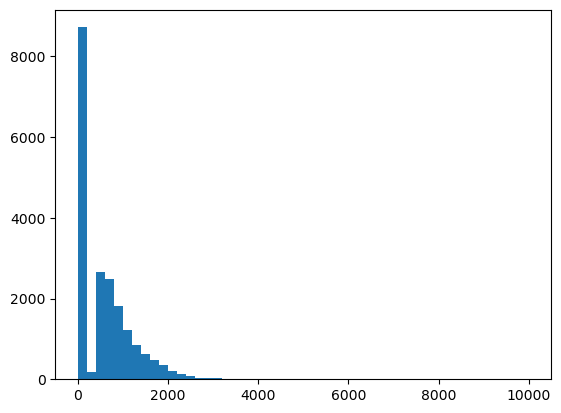

In [5]:
plt.hist(train['Income'], bins=50)
plt.show()

#### 0이 대부분

#### 0값 제거한 분포 확인

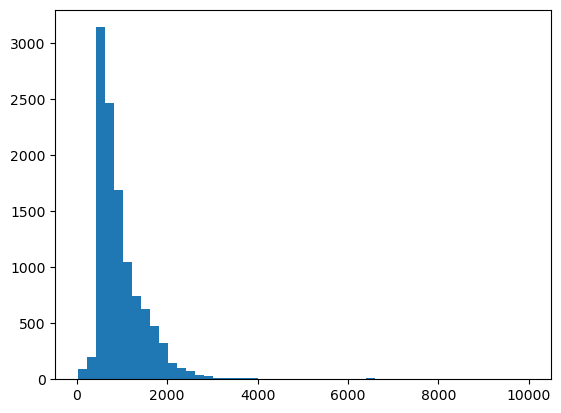

In [6]:
df = train.loc[train['Income']>0]
plt.hist(df['Income'], bins=50)
plt.show()

#### 2000 이상 확인

491


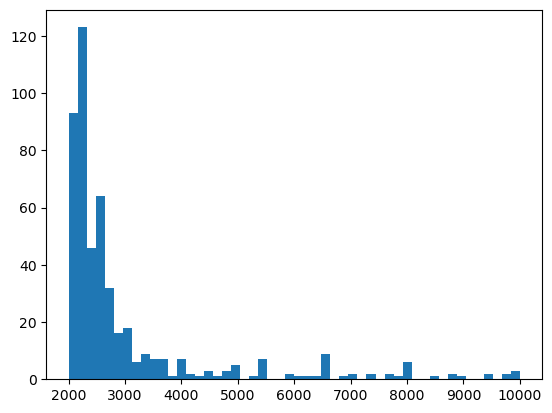

In [9]:
df = train.loc[train['Income']>2000]
print(len(df))
plt.hist(df['Income'], bins=50)
plt.show()

491


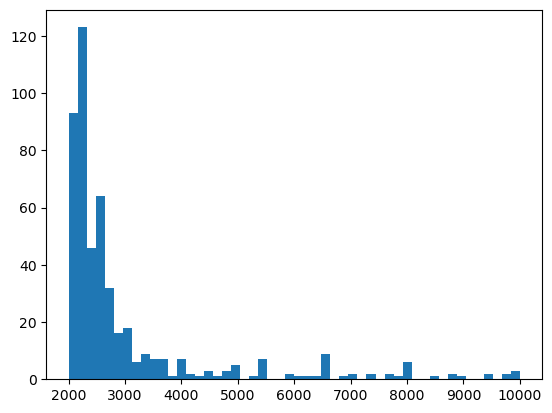

In [12]:
df = train.loc[train['Income']>2000]
print(len(df))
plt.hist(df['Income'], bins=50)
plt.show()

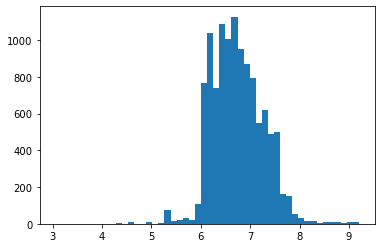

In [17]:
plt.hist(np.log(df['Income']+1), bins=50)
plt.show()

In [22]:
sum(train['Income']==0), sum(train['Income']>0)

(8697, 11303)

#### income = 0 : 8697, income > 0 : 11303
#### 즉 대략 반반 정도의 비율

### Age

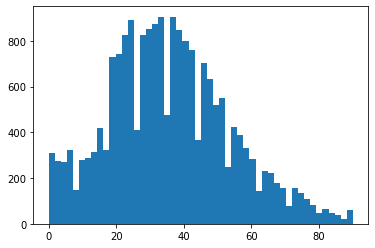

In [25]:
plt.hist(train['Age'], bins=50)
plt.show()

### Working Week

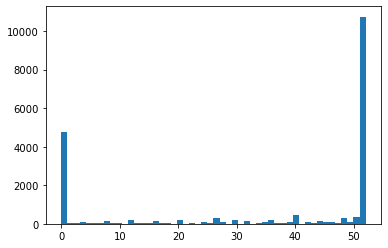

In [29]:
plt.hist(train['Working_Week (Yearly)'], bins=50)
plt.show()

In [30]:
np.unique(train['Working_Week (Yearly)'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

#### 0 또는 52가 대부분

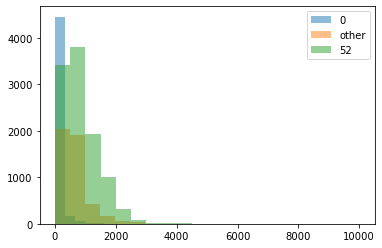

In [56]:
income_0 = train.loc[train['Working_Week (Yearly)']==0].Income
income_52 = train.loc[train['Working_Week (Yearly)']==52].Income
income_other = train.loc[(train['Working_Week (Yearly)']>0)&(train['Working_Week (Yearly)']<52)].Income
plt.hist(income_0, alpha=0.5, bins=20, label=0)
plt.hist(income_other, alpha=0.5, bins=20, label='other')
plt.hist(income_52, alpha=0.5, bins=20, label=52)
plt.legend()
plt.show()

### Gains, Losses, Dividend

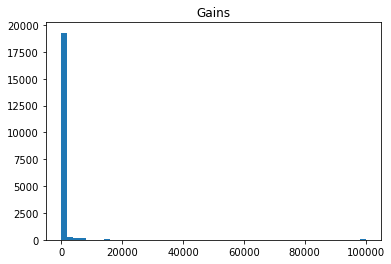

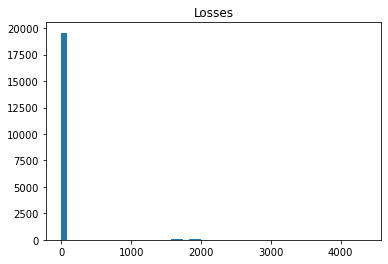

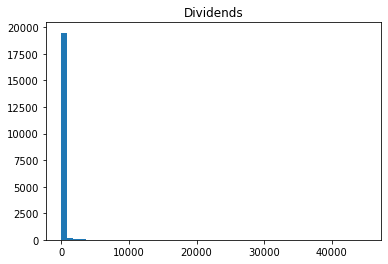

In [59]:
cols = ['Gains', 'Losses', 'Dividends']

for c in cols:
    plt.title(c)
    plt.hist(train[c], bins=50)
    plt.show()

#### 대부분 0에 치우친 값, 다른 처리 필요

### 카테고리 컬럼 확인

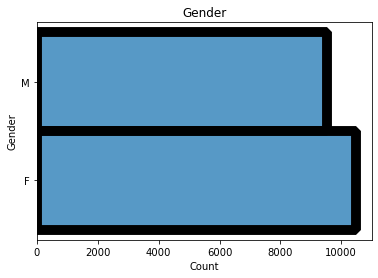

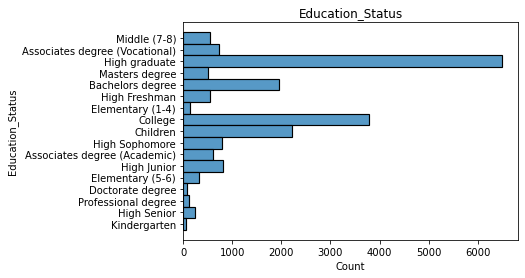

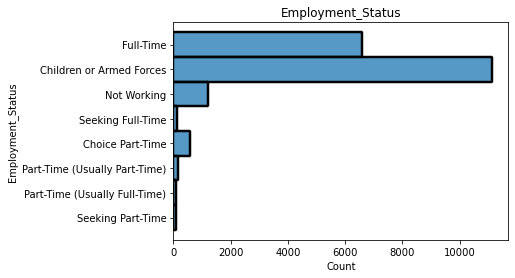

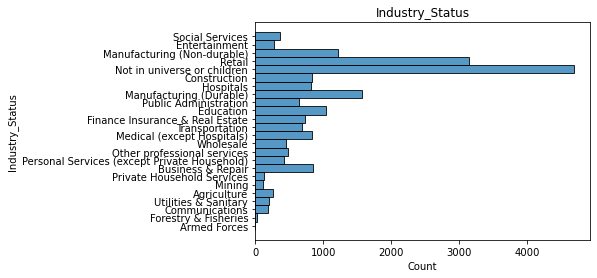

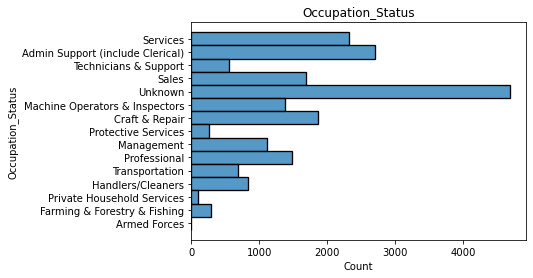

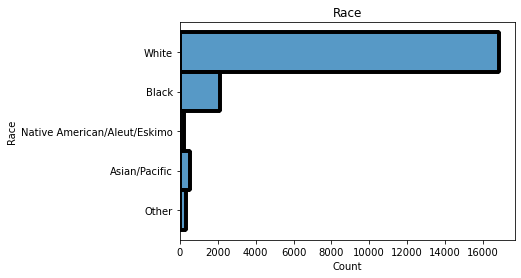

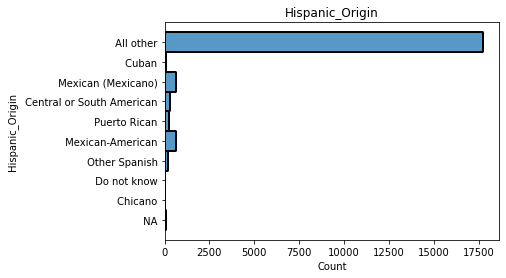

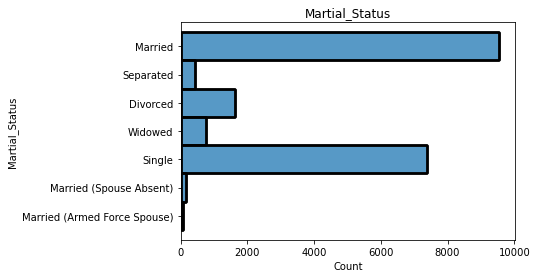

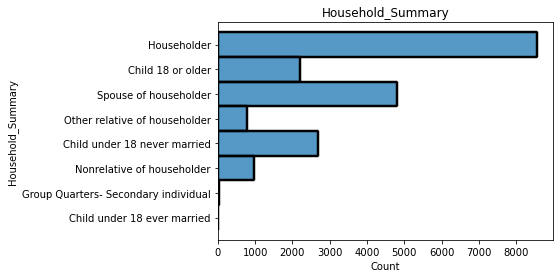

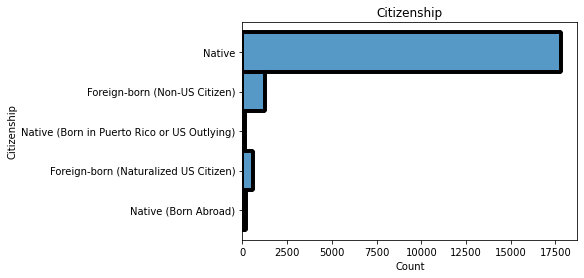

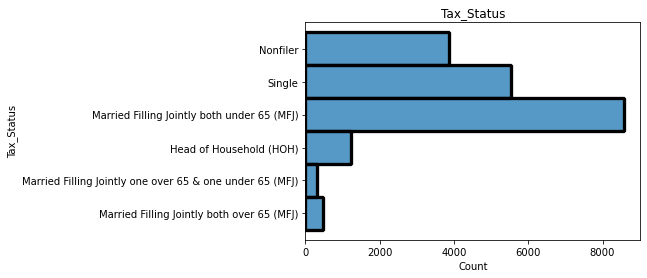

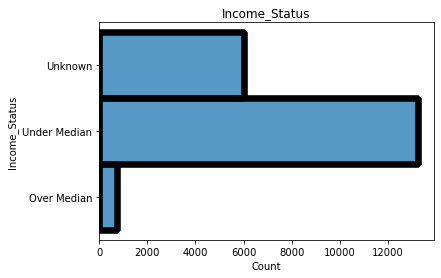

In [66]:
for c in cat_cols[1:]:
    if c in ['Hispanic_Origin', 'Household_Status', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)']:
        continue
    plt.title(c)
    sns.histplot(y=train[c])
    plt.show()

### employment status : children or armed forces

### industry status : Not in universe or children

### occupation status : unknown

### Income_Status : unknown

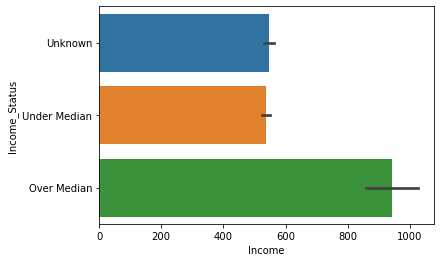

In [72]:
sns.barplot(y='Income_Status', x='Income', data=train, orient='h')
plt.show()

### income > 1000과의 분포 차이 확인

In [20]:
train['over'] = train['Income'] > 875

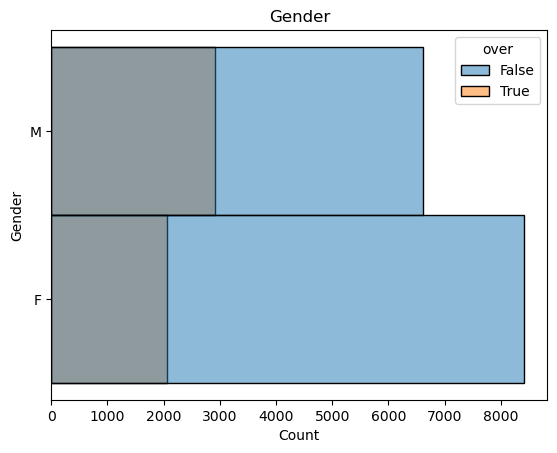

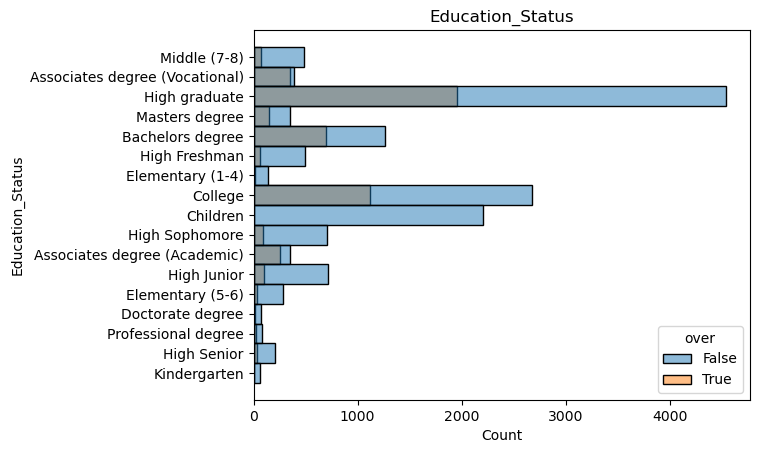

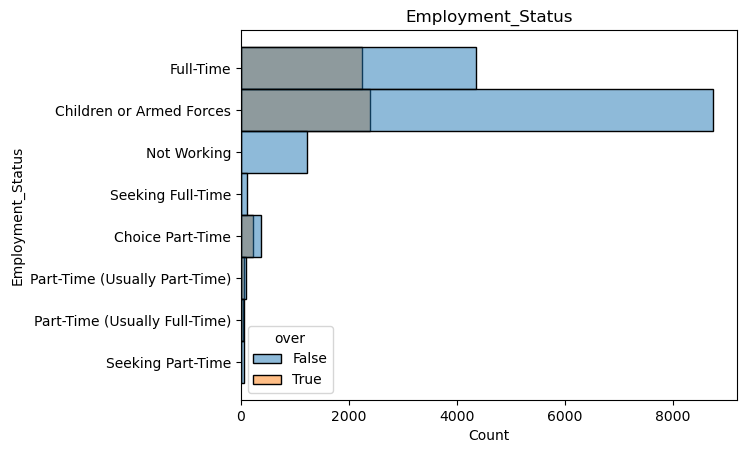

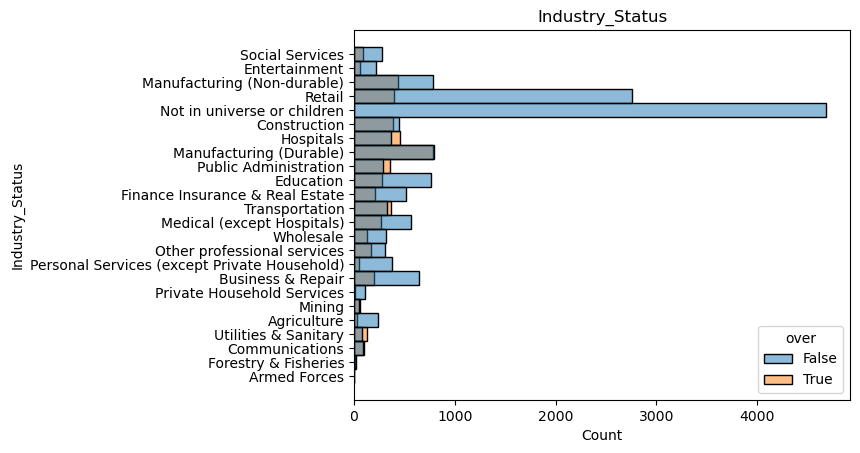

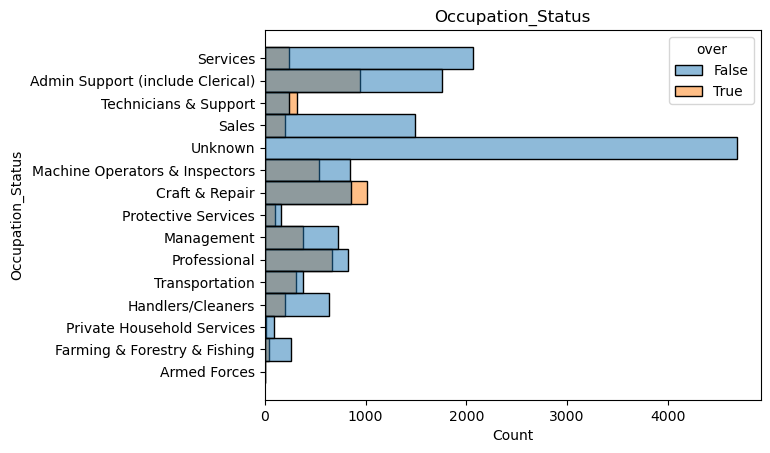

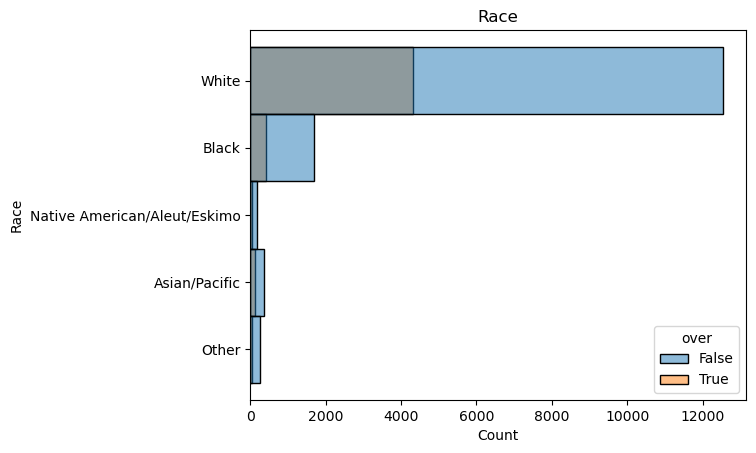

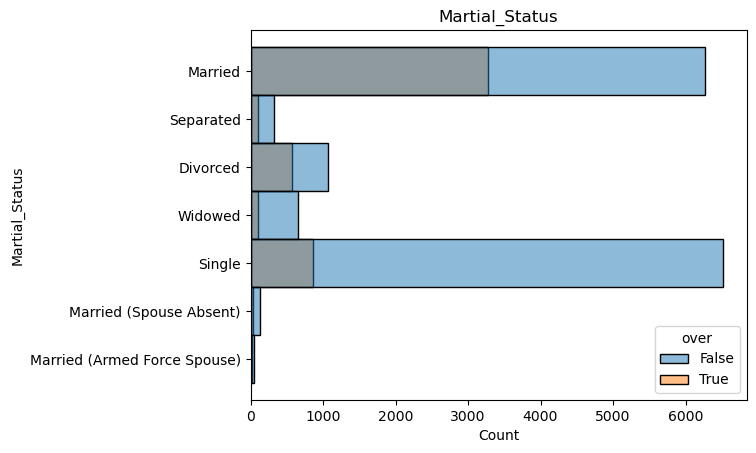

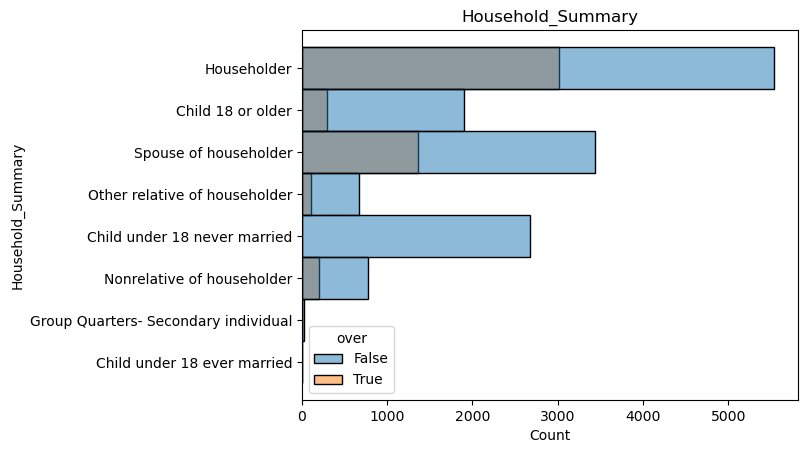

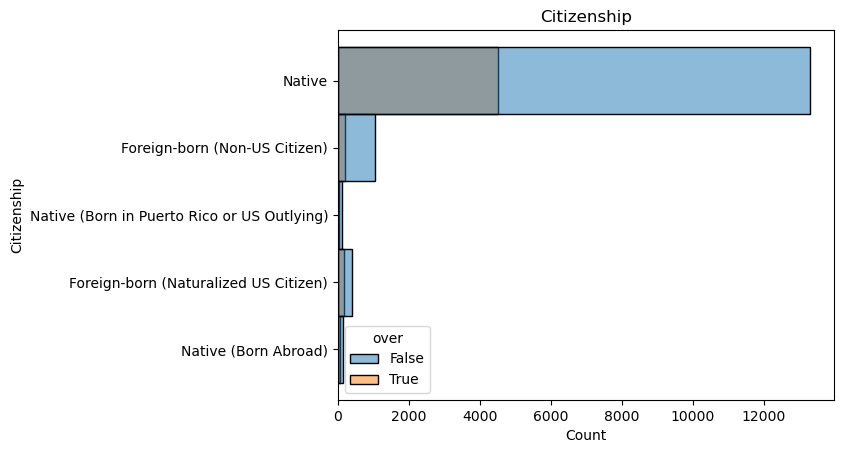

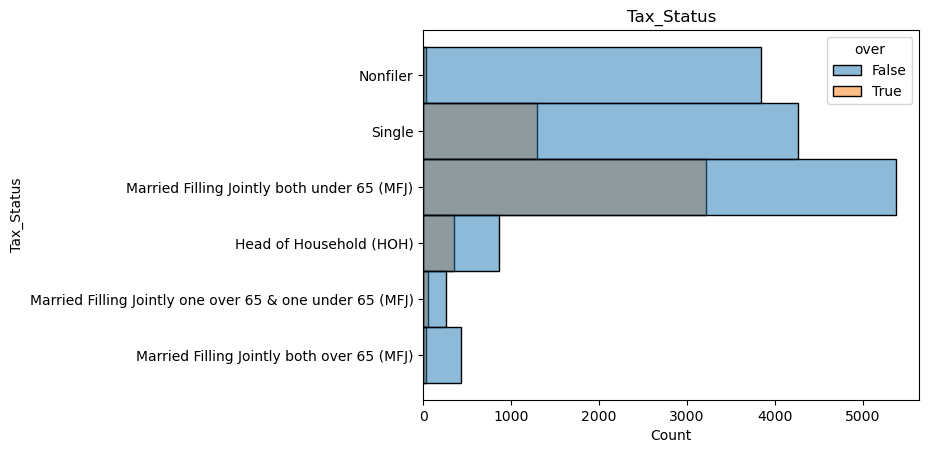

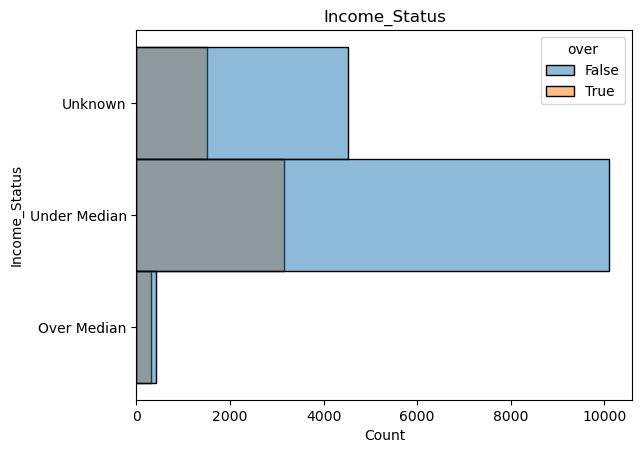

In [21]:
for c in cat_cols[1:]:
    if c in ['Hispanic_Origin', 'Household_Status', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)']:
        continue
    plt.title(c)
    sns.histplot(y=c, data=train, hue='over')
    plt.show()